# Projet numérique Maths-Info Équations Différentielles
## Alex Morais et Juliette Montantème

### Pas fixe

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np


On implémente une fonction qui met en application la méthode d'Euler explicite avec un pas fixe $dt$, elle renvoie la liste des instants et celles des valeurs de la solutions à ces mêmes instants. 

In [3]:
def solve_euler_explicite(f, x0, dt, tf, t0 = 0):
    t, x = [t0], [x0]
    while t[-1] < tf:
        x.append(x[-1] + dt * f(t[-1], x[-1]))
        t.append(t[-1] + dt)
    return t, x

On va valider les performances de cet algorithme à l'aide de l'équation différentielle $x' = x$, dont la solution exacte est la fonction exponentielle. Dans l'exemple on a donc $f = id$.

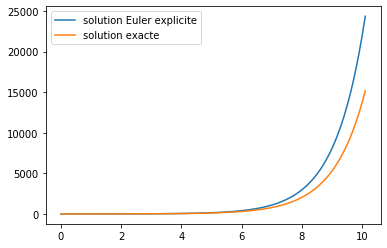

In [5]:
def f(t, x):
    return x
def exp(y):
    return math.exp(y)

t = solve_euler_explicite(f, 1, 0.1, 10)[0]
x = solve_euler_explicite(f, 1, 0.1, 10)[1]
x2 = np.array([exp(y) for y in t])

plt.plot(t, x2, label = "solution Euler explicite")
plt.plot(t, x, label = "solution exacte")
plt.legend()
plt.show()

On constate qu'il y a une erreur de la solution obtenue avec la solution réelle. Pour illustrer le fait que le schéma soit convergent d'ordre 1, on va d'abors calculer l'erreur globale obtenue avec la méthode. Ensuite, si la convergence est d'ordre 1, on devrait observer une relation linéaire entre l'erreur globale et le pas de temps. On va donc faire varier le pas de temps et tracer la courbe de l'erreur en fonction du pas de temps pour vérifier ce résultat. 

In [6]:
def erreur_globale(f, g, x0, dt, tf, t0 = 0):
    t, x = solve_euler_explicite(f, x0, dt, tf, t0)
    n = len(t)
    err = 0
    for j in range(n):
        if abs(g(t[j]) - x[j]) > err:
            err = abs(g(t[j]) - x[j])
    return err

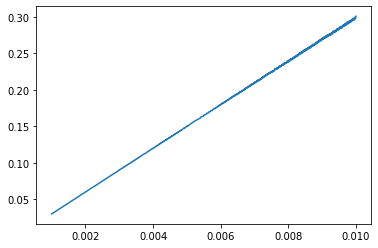

In [11]:
pas = np.linspace(0.001, 0.01, 1000)
erreur = np.array([erreur_globale(f, exp, 1, dt, 3) for dt in pas])
plt.plot(pas, erreur)
plt.show()

Le résultat obtenu est similaire à celui attendu, le schéma est bien convergent d'ordre 1.

Pour étudier la convergence d'ordre 2, on va choisir un autre schéma: la méthode de Heun. On commence par l'implémenter, sur le modèle de la fonction `solve_euler_explicite`. Puis, de la même façon on implémente la fonction `erreur_globale_heun`pour recalculer l'erreur avec cette méthode.

In [13]:
def solve_heun(f, x0, dt, tf, t0 = 0):
    t, x = [t0], [x0]
    while t[-1] < tf:
        t.append(t[-1] + dt)
        x.append(x[-1] + dt/2 * (f(t[-2], x[-1]) + f(t[-1], x[-1] + dt * f(t[-2], x[-1])))) 
    return t, x

In [14]:
def erreur_globale_heun(f, g, x0, dt, tf, t0 = 0):
    t, x = solve_heun(f, x0, dt, tf, t0)
    n = len(t)
    err = 0
    for j in range(n):
        if abs(g(t[j]) - x[j]) > err:
            err = abs(g(t[j]) - x[j])
    return err   

Pour mettre en évidence la convergence d'ordre 2, on fait varier le pas de temps et au lieu de tracer l'évolution de l'erreur en fonction du pas de temps, on trace celle de l'erreur en fonction du **carré** du pas de temps.

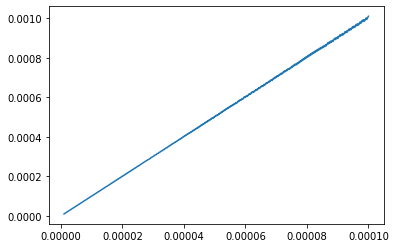

In [10]:
erreur = np.array([erreur_globale_heun(f, exp, 1, dt, 3) for dt in pas])
plt.plot(pas**2, erreur)
plt.show()

Le résultat est celui escompté.

### Adaptation du pas de temps